# Introduction to Torch
- Deep learning library developed by Meta (Formerly Facebook)
- Is a key component of PyTorch ecosystem

Similarities with Autograd:
- Automatic differentiation
- Easy of use
- Pythonic integration
- Dynamic computational graphs
- Gradient computation and optimization

Differences with AutoGrad:
- Based on **tensors** (multidimensional matrixes) instead of **values**
- Easy to execute on GPUs of different vendors
- Lots of components and tools integrated

## A simple example in torch

In [1]:
import torch

x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())

0.7071066904050358


/home/milton/miniconda3/envs/torch_teach/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
o.backward()

print('x1', x1.grad.item())
print('w1', w1.grad.item())
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('b', b.grad.item())

x1 -1.5000003851533106
w1 1.0000002567688737
x2 0.5000001283844369
w2 0.0
b 0.5000001283844369


## A neural network in torch

In [3]:
xs = torch.tensor([
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, -1.0],
    [1.0, 1.0, -1.0]
])
ys = torch.tensor([1.0, -1.0, -1.0, 1.0])

In [4]:
# Neuron, three inputs
W = torch.randn((3, 1))
W

tensor([[-1.2771],
        [-1.0198],
        [-1.0095]])

In [5]:
# activation of the neuron on the four inputs
xs @ W

tensor([[-4.6042],
        [-3.3162],
        [-0.6489],
        [-1.2874]])

In [6]:
# Lets now add the bias
b = torch.randn((1,))
b

tensor([-1.6452])

In [7]:
# activation of the first neuron for the four inputs
xs @ W + b

tensor([[-6.2494],
        [-4.9614],
        [-2.2941],
        [-2.9327]])

In [8]:
# lets add more neurons
W = torch.randn((3, 4))
W

tensor([[-0.1841, -1.2830, -1.2930,  0.2735],
        [ 0.3432,  2.6786,  0.5324,  0.9395],
        [ 0.1809, -0.2575,  0.1007, -0.8770]])

In [9]:
# what is now the product?
xs @ W

tensor([[ 0.4805,  5.7274, -1.0894,  4.2426],
        [-0.8052, -6.6565, -4.3611, -0.5574],
        [ 0.0702,  2.2946, -0.2148,  1.9533],
        [-0.0218,  1.6531, -0.8613,  2.0900]])

In [10]:
# xs -> objects x features
# W -> weights x neurons
# xs @ W -> objects x neurons, each cell contains sum(features*weights)
xs.shape, W.shape, (xs@W).shape

(torch.Size([4, 3]), torch.Size([3, 4]), torch.Size([4, 4]))

In [11]:
# the bias is added per neuron, after xs * W
b = torch.randn((1,4))
act = xs @ W + b
display(xs @ W)
display(b)
display(act)

tensor([[ 0.4805,  5.7274, -1.0894,  4.2426],
        [-0.8052, -6.6565, -4.3611, -0.5574],
        [ 0.0702,  2.2946, -0.2148,  1.9533],
        [-0.0218,  1.6531, -0.8613,  2.0900]])

tensor([[-0.0355,  0.4848,  0.1603,  2.1485]])

tensor([[ 0.4450,  6.2122, -0.9291,  6.3910],
        [-0.8407, -6.1717, -4.2009,  1.5910],
        [ 0.0348,  2.7794, -0.0545,  4.1017],
        [-0.0573,  2.1379, -0.7010,  4.2385]])

In [12]:
# now, it is time to evaluate the activation function on the activation
(xs @ W + b).tanh()

tensor([[ 0.4178,  1.0000, -0.7302,  1.0000],
        [-0.6862, -1.0000, -0.9996,  0.9203],
        [ 0.0348,  0.9923, -0.0544,  0.9995],
        [-0.0572,  0.9726, -0.6050,  0.9996]])

As a summary, a fully connected layer is formed by:
- A weight matrix that has one row per input value, and a column per output value
- A bias vector, that has a single row and a column per neuron
- An activation function

Note: All the elements here are differentiable.

In [13]:
# back to the original problem
display(xs)
display(ys)

tensor([[ 2.0000,  3.0000, -1.0000],
        [ 3.0000, -1.0000,  0.5000],
        [ 0.5000,  1.0000, -1.0000],
        [ 1.0000,  1.0000, -1.0000]])

tensor([ 1., -1., -1.,  1.])

In [14]:
# we have three features and one output, so we need one output neuron
W = torch.randn((3, 1))
b = torch.randn((1, 1))

out = (xs @ W + b).tanh()
out

tensor([[-0.0300],
        [ 0.4795],
        [-0.6968],
        [-0.5644]])

In [15]:
# lets calculate the loss
loss = torch.sum((out - ys)**2)
loss

tensor(20.1396)

In [16]:
# Uppps, it should not be that large!
out-ys

tensor([[-1.0300,  0.9700,  0.9700, -1.0300],
        [-0.5205,  1.4795,  1.4795, -0.5205],
        [-1.6968,  0.3032,  0.3032, -1.6968],
        [-1.5644,  0.4356,  0.4356, -1.5644]])

In [17]:
out.shape, ys.shape, (out-ys).shape

(torch.Size([4, 1]), torch.Size([4]), torch.Size([4, 4]))

In [18]:
# one solution is remove the last dimension from out
out.shape, out.squeeze().shape

(torch.Size([4, 1]), torch.Size([4]))

In [19]:
out.squeeze() - ys

tensor([-1.0300,  1.4795,  0.3032, -1.5644])

In [20]:
loss = torch.sum((out.squeeze() - ys)**2)
loss

tensor(5.7889)

In [21]:
# since everything is differentiable, we can backpropagate the loss
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [22]:
# In torch, we need to warn the framework about the tensors we need to calculate the grad

# network definition, seed controled
g = torch.Generator().manual_seed(31416)
W = torch.randn((3, 1), generator=g, requires_grad=True)
b = torch.randn((1, 1), generator=g, requires_grad=True)

In [23]:
learning_rate = 0.1
for _ in range(100):
    # forward pass
    out = (xs @ W + b).tanh()
    loss = torch.mean((out.squeeze() - ys)**2)
#     print(loss.item())

    # backward pass, need to remove the gradients
    W.grad = None
    b.grad = None
    loss.backward()

    # update parameters
    W.data += -learning_rate * W.grad
    b.data += -learning_rate * b.grad
print("Final loss:", loss.item())

Final loss: 0.5335512161254883


In [24]:
out.data, ys

(tensor([[ 0.8151],
         [-0.7351],
         [ 0.0957],
         [ 0.0894]]),
 tensor([ 1., -1., -1.,  1.]))

In [25]:
g = torch.Generator().manual_seed(31416)
W = torch.randn((3, 1), generator=g, requires_grad=True)
b = torch.randn((1, 1), generator=g, requires_grad=True)

In [26]:
# Let simplify the code
learning_rate = 0.1
parameters = [W, b]
for _ in range(100):
    # forward pass
    out = (xs @ W + b).tanh()
    loss = torch.mean((out.squeeze() - ys)**2)
    print(loss.item())

    # backward pass, need to remove the gradients
    for p in parameters:
        p.grad = None
    loss.backward()

    # update parameters
    for p in parameters:
        p.data += -learning_rate * p.grad
        
print("Final loss:", loss.item())


0.9803782105445862
0.9798128604888916
0.9792225360870361
0.9786055684089661
0.9779596924781799
0.9772826433181763
0.9765719771385193
0.9758249521255493
0.9750387072563171
0.974209725856781
0.973334789276123
0.9724098443984985
0.9714303612709045
0.9703920483589172
0.9692895412445068
0.9681171774864197
0.9668686389923096
0.9655371904373169
0.9641155004501343
0.9625952243804932
0.9609677791595459
0.9592238664627075
0.9573534727096558
0.9553462862968445
0.9531917572021484
0.9508795738220215
0.9484006762504578
0.9457467198371887
0.9429123997688293
0.9398964643478394
0.9367031455039978
0.9333431720733643
0.9298364520072937
0.9262111783027649
0.922502875328064
0.9187514185905457
0.9149946570396423
0.9112610220909119
0.9075634479522705
0.9038944244384766
0.9002285003662109
0.8965272903442383
0.8927478194236755
0.8888483047485352
0.8847925066947937
0.880550742149353
0.8760994672775269
0.8714191913604736
0.8664937019348145
0.8613086342811584
0.8558508157730103
0.8501080870628357
0.84406983852386

In [27]:
out.data, ys

(tensor([[ 0.8151],
         [-0.7351],
         [ 0.0957],
         [ 0.0894]]),
 tensor([ 1., -1., -1.,  1.]))

## Solving moon problem, using the GPU

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(1337)
random.seed(1337)

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


/home/milton/miniconda3/envs/torch_teach/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


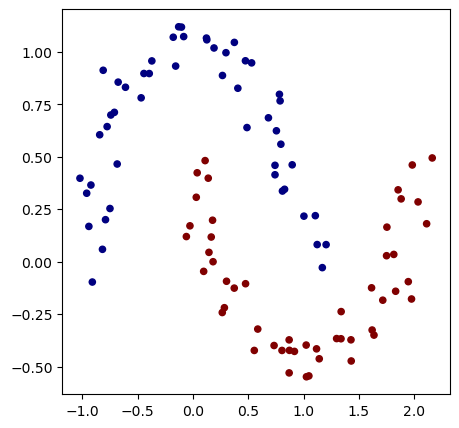

In [30]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()

In [31]:
# Lets transform them to tensors, and keep only the first to simplify the explanations
xs = torch.tensor(X, dtype=torch.float32, device=device)[:5]
ys = torch.tensor(y, device=device)[:5]
xs.shape, ys.shape
ys.device

device(type='cuda', index=0)

In [32]:
xs, ys

(tensor([[ 1.1221,  0.0815],
         [-0.8188,  0.0588],
         [ 1.6137, -0.1246],
         [-0.9230,  0.3652],
         [ 0.1439,  0.0444]], device='cuda:0'),
 tensor([0, 0, 1, 0, 1], device='cuda:0'))

In [33]:
# Now, lets create a neural network having two hidden layers, with 4 and 5 neurons
# Since it is a classification problem, we will use one output layer per class.

In [34]:
g = torch.Generator(device=device).manual_seed(31416+2)
W1 = torch.randn((2, 4), generator=g, requires_grad=True, device=device)
b1 = torch.randn((1, 4), generator=g, requires_grad=True, device=device)

W2 = torch.randn((4, 5), generator=g, requires_grad=True, device=device)
b2 = torch.randn((1, 5), generator=g, requires_grad=True, device=device)

W3 = torch.randn((5, 2), generator=g, requires_grad=True, device=device)
b3 = torch.randn((1, 2), generator=g, requires_grad=True, device=device)

parameters = [W1, b1, W2, b2, W3, b3]

In [35]:
# forward pass
l1_out = (xs @ W1 + b1).tanh()
l2_out = (l1_out @ W2 + b2).tanh()
l3_out = (l2_out @ W3 + b3)
l3_out


tensor([[-0.0736,  0.6695],
        [ 0.6425, -0.5612],
        [-0.0762,  0.7346],
        [ 1.0399, -0.8422],
        [-0.3261,  0.4933]], device='cuda:0', grad_fn=<AddBackward0>)

In [36]:
l3_out.device

device(type='cuda', index=0)

We want the output of the network to be class probabilities, so we need to transform the outputs. To be considered as a probability, values must between 0 and 1, and they must add to 1.

First, lets apply the exponencial function, to turn all values positive.

In [39]:
l3_out.exp()

tensor([[0.9290, 1.9533],
        [1.9013, 0.5705],
        [0.9267, 2.0847],
        [2.8290, 0.4308],
        [0.7217, 1.6377]], device='cuda:0', grad_fn=<ExpBackward0>)

Now, re-scale the values so they add 1

In [40]:
value = l3_out.exp()
probs = (value / value.sum(dim=1).unsqueeze(dim=1))
probs[:5]

tensor([[0.3223, 0.6777],
        [0.7692, 0.2308],
        [0.3077, 0.6923],
        [0.8679, 0.1321],
        [0.3059, 0.6941]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# Safety check
probs.sum(dim=1)

Now we have probabilities as the output of the network. How to create a loss function, using this probabilities.

One commonly used idea is to use the maximal likelihood estimation. It estimates the quality of the result by multiplying the probabilities obtained for the correct class.

In [41]:
display(probs)
ys

tensor([[0.3223, 0.6777],
        [0.7692, 0.2308],
        [0.3077, 0.6923],
        [0.8679, 0.1321],
        [0.3059, 0.6941]], device='cuda:0', grad_fn=<DivBackward0>)

tensor([0, 0, 1, 0, 1], device='cuda:0')

In [42]:
# In our case
probs[0, 0], probs[1, 1], probs[2, 0], probs[3, 1], probs[4,1]

(tensor(0.3223, device='cuda:0', grad_fn=<SelectBackward0>),
 tensor(0.2308, device='cuda:0', grad_fn=<SelectBackward0>),
 tensor(0.3077, device='cuda:0', grad_fn=<SelectBackward0>),
 tensor(0.1321, device='cuda:0', grad_fn=<SelectBackward0>),
 tensor(0.6941, device='cuda:0', grad_fn=<SelectBackward0>))

In [43]:
# How to obtain this probabilities using tensor manipulation: using a type of indexing
probs[torch.arange(len(ys)), ys]

tensor([0.3223, 0.7692, 0.6923, 0.8679, 0.6941], device='cuda:0',
       grad_fn=<IndexBackward0>)

In [44]:
# lets multiply them
likelihood = probs[torch.arange(len(ys)), ys].prod()
likelihood

tensor(0.1034, device='cuda:0', grad_fn=<ProdBackward0>)

This is a quite small number, and we only have 5 results ... imagine when we have 100s

Solution, use the logarithms, and average the results

In [45]:
log_likelihood = probs[torch.arange(len(ys)), ys].log().mean()
log_likelihood

tensor(-0.4539, device='cuda:0', grad_fn=<MeanBackward0>)

Since likelihood is higher (so log_likelihood) in better results, and we need a loss function, we will invert the sign.

**Note:** All performed operations are derivables!

In [46]:
nll = - log_likelihood
nll

tensor(0.4539, device='cuda:0', grad_fn=<NegBackward0>)

Lets put it all together

In [47]:
xs = torch.tensor(X, dtype=torch.float32, device=device)
ys = torch.tensor(y, device=device)

In [48]:
g = torch.Generator(device=device).manual_seed(31416+2)
W1 = torch.randn((2, 4), generator=g, requires_grad=True, device=device)
b1 = torch.randn((1, 4), generator=g, requires_grad=True, device=device)

W2 = torch.randn((4, 5), generator=g, requires_grad=True, device=device)
b2 = torch.randn((1, 5), generator=g, requires_grad=True, device=device)

W3 = torch.randn((5, 2), generator=g, requires_grad=True, device=device)
b3 = torch.randn((1, 2), generator=g, requires_grad=True, device=device)

parameters = [W1, b1, W2, b2, W3, b3]

In [49]:
learning_rate = 0.1
epochs = 2000

for epoch in range(epochs):
    # forward pass
    l1_out = (xs @ W1 + b1).tanh()
    l2_out = (l1_out @ W2 + b2).tanh()
    l3_out = (l2_out @ W3 + b3)
    value = l3_out.exp()
    probs = (value / value.sum(dim=1).unsqueeze(dim=1))
    log_likelihood = probs[torch.arange(len(ys)), ys].log().mean()
    loss = -log_likelihood
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss={loss.item()}")
    
    # backward pass, need to remove the gradients
    for p in parameters:
        p.grad = None
    loss.backward()

    # update parameters
    for p in parameters:
        p.data += -learning_rate * p.grad
print(loss.item())

Epoch 0, loss=0.5822694897651672
Epoch 100, loss=0.2568088173866272
Epoch 200, loss=0.2104198932647705
Epoch 300, loss=0.15599974989891052
Epoch 400, loss=0.11313247680664062
Epoch 500, loss=0.08427612483501434
Epoch 600, loss=0.06375759094953537
Epoch 700, loss=0.04834745451807976
Epoch 800, loss=0.036784399300813675
Epoch 900, loss=0.028278043493628502
Epoch 1000, loss=0.022072605788707733
Epoch 1100, loss=0.017521420493721962
Epoch 1200, loss=0.014145038090646267
Epoch 1300, loss=0.011608017608523369
Epoch 1400, loss=0.009676681831479073
Epoch 1500, loss=0.008186698891222477
Epoch 1600, loss=0.007021399214863777
Epoch 1700, loss=0.0060973805375397205
Epoch 1800, loss=0.005354690365493298
Epoch 1900, loss=0.004749874118715525
0.004255752079188824


In [50]:
# Lets calculate the classifier accuracy
probs[torch.arange(len(ys)), ys] > 0.5

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')

The classifier commits no mistakes, so it's accuracy is 1.0. 

Lets plot the decision boundary

In [51]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
Xmesh[:10]

array([[-2.02219391, -1.5486393 ],
       [-1.77219391, -1.5486393 ],
       [-1.52219391, -1.5486393 ],
       [-1.27219391, -1.5486393 ],
       [-1.02219391, -1.5486393 ],
       [-0.77219391, -1.5486393 ],
       [-0.52219391, -1.5486393 ],
       [-0.27219391, -1.5486393 ],
       [-0.02219391, -1.5486393 ],
       [ 0.22780609, -1.5486393 ]])

In [52]:
xs_full = torch.tensor(Xmesh, device=device).float()
l1_out = (xs_full @ W1 + b1).tanh()
l2_out = (l1_out @ W2 + b2).tanh()
l3_out = (l2_out @ W3 + b3).tanh()
value = l3_out.exp()
probs = (value / value.sum(dim=1).unsqueeze(dim=1))
probs[:5]

tensor([[0.8806, 0.1194],
        [0.8798, 0.1202],
        [0.8252, 0.1748],
        [0.1287, 0.8713],
        [0.1195, 0.8805]], device='cuda:0', grad_fn=<SliceBackward0>)

In [53]:
scores = torch.max(probs, dim=1).indices
scores

tensor([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(-1.548639298268643, 1.951360701731357)

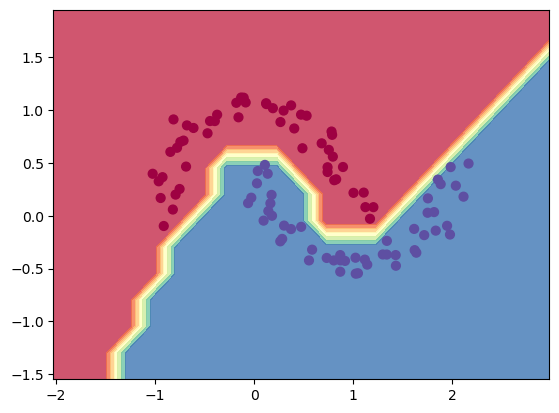

In [54]:
Z = np.array([s.data > 0 for s in scores.cpu()])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### Use modules in torch.nn

In [55]:
import torch.nn as nn
import torch.nn.functional as F

xs = torch.tensor(X, dtype=torch.float32, device=device)
ys = torch.tensor(y, device=device)

# Using torch fully connected layers
l1 = nn.Linear(in_features=2, out_features=4, device=device)
l2 = nn.Linear(in_features=4, out_features=5, device=device)
l3 = nn.Linear(in_features=5, out_features=2, device=device)
parameters = list(l1.parameters()) + list(l2.parameters()) + list(l3.parameters())

x = l1(xs).tanh()
x = l2(x).tanh()
x = l3(x)

# soft-max layer + entropy loss = cross_entropy
loss = F.cross_entropy(x, ys)
loss

tensor(0.7303, device='cuda:0', grad_fn=<NllLossBackward0>)

In [56]:
learning_rate = 0.1
epochs = 20000

for epoch in range(epochs):
    
    # forward pass
    x = l1(xs).tanh()
    x = l2(x).tanh()
    x = l3(x)
    loss = F.cross_entropy(x, ys)
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, loss={loss.item()}")
    
    # backward pass, need to remove the gradients
    for p in parameters:
        p.grad = None
    loss.backward()

    # update parameters
    for p in parameters:
        p.data += -learning_rate * p.grad
        
print(loss.item())

Epoch 0, loss=0.7302747964859009
Epoch 1000, loss=0.26329442858695984
Epoch 2000, loss=0.012055945582687855
Epoch 3000, loss=0.0037185701075941324
Epoch 4000, loss=0.0019225141732022166
Epoch 5000, loss=0.0012272953754290938
Epoch 6000, loss=0.0008768537663854659
Epoch 7000, loss=0.0006712847389280796
Epoch 8000, loss=0.0005382896633818746
Epoch 9000, loss=0.0004461746721062809
Epoch 10000, loss=0.00037907049409113824
Epoch 11000, loss=0.00032829170231707394
Epoch 12000, loss=0.00028867225046269596
Epoch 13000, loss=0.00025700294645503163
Epoch 14000, loss=0.00023116842203307897
Epoch 15000, loss=0.0002097382239298895
Epoch 16000, loss=0.00019170111045241356
Epoch 17000, loss=0.00017633075185585767
Epoch 18000, loss=0.0001630927436053753
Epoch 19000, loss=0.00015157902089413255
0.0001415098231518641


Lets put in into a more compacted version, using Sequential, and an optimizer

In [57]:
xs = torch.tensor(X, dtype=torch.float32, device=device)
ys = torch.tensor(y, device=device)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(2, 4, device=device), nn.Tanh(),
    nn.Linear(4, 5, device=device), nn.Tanh(),
    nn.Linear(5, 2, device=device)
)

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
epochs = 10000

for epoch in range(epochs):
    
    # Forward pass
    x = model(xs)
    loss = F.cross_entropy(x, ys)
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, loss={loss.item()}")
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()

    # Update parameters
    optimizer.step()
        
print(loss.item())


Epoch 0, loss=0.7949962019920349
Epoch 1000, loss=0.022130683064460754
Epoch 2000, loss=0.005628710612654686
Epoch 3000, loss=0.0027956049889326096
Epoch 4000, loss=0.0017496825894340873
Epoch 5000, loss=0.0012333247577771544
Epoch 6000, loss=0.0009344539721496403
Epoch 7000, loss=0.0007430734694935381
Epoch 8000, loss=0.0006116260192357004
Epoch 9000, loss=0.0005165775073692203
0.0004451643908396363


Here we used an optimizer, that performs the update operation faster and smartly, together with the zero_grad() operation.

There is other way to create the network, subclassing the Module class.

In [58]:

# Define the custom model class
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(2, 4, device=device)
        self.layer2 = nn.Linear(4, 5, device=device)
        self.layer3 = nn.Linear(5, 2, device=device)

    def forward(self, xs):
        x = self.layer1(xs).tanh()
        x = self.layer2(x).tanh()
        x = self.layer3(x)
        return x

# Instantiate the model
model = MyModel()

xs = torch.tensor(X, dtype=torch.float32, device=device)
ys = torch.tensor(y, device=device)

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs = 2000

for epoch in range(epochs):
    # Forward pass
    outputs = model(xs)
    loss = F.cross_entropy(outputs, ys)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss={loss.item()}")
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()

    # Update parameters
    optimizer.step()
        
print(loss.item())


Epoch 0, loss=0.6942527294158936
Epoch 100, loss=0.3072017729282379
Epoch 200, loss=0.2892119288444519
Epoch 300, loss=0.2863970398902893
Epoch 400, loss=0.28454163670539856
Epoch 500, loss=0.28312432765960693
Epoch 600, loss=0.28198695182800293
Epoch 700, loss=0.28102701902389526
Epoch 800, loss=0.2801797389984131
Epoch 900, loss=0.27940434217453003
Epoch 1000, loss=0.27867352962493896
Epoch 1100, loss=0.2779683768749237
Epoch 1200, loss=0.27727553248405457
Epoch 1300, loss=0.2765851318836212
Epoch 1400, loss=0.27589038014411926
Epoch 1500, loss=0.2751862406730652
Epoch 1600, loss=0.2744693458080292
Epoch 1700, loss=0.2737365961074829
Epoch 1800, loss=0.27298468351364136
Epoch 1900, loss=0.27220889925956726
0.27140942215919495


# Some unfrequent uses of torch autograd

## KNN

In [59]:
import torch

class KMeansTorch:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4, lr=0.01):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.lr = lr

    def fit(self, X):
        # Randomly initialize the centroids as k random samples from X
        indices = torch.randperm(X.size(0))[:self.n_clusters]
        self.centroids = X[indices]
        self.centroids.requires_grad = True  # Enable gradients for centroids

        optimizer = torch.optim.Adam([self.centroids], lr=self.lr)

        for i in range(self.max_iters):
            # Assign each point to the nearest centroid
            distances = torch.cdist(X, self.centroids, p=2)
            cluster_assignments = torch.argmin(distances, dim=1)

            # Compute the loss (sum of squared distances)
            loss = 0
            for k in range(self.n_clusters):
                loss += ((X[cluster_assignments == k] - self.centroids[k]) ** 2).sum()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Check for convergence (if centroids do not change significantly)
            with torch.no_grad():
                if i > 0 and prev_loss - loss.item() < self.tol:
                    break
                prev_loss = loss.item()

        self.labels_ = cluster_assignments.detach()
        return self

    def predict(self, X):
        distances = torch.cdist(X, self.centroids, p=2)
        return torch.argmin(distances, dim=1)

In [60]:
# Function to generate 2D Gaussian data
def generate_2d_gaussian(mean, cov, num_samples):
    return np.random.multivariate_normal(mean, cov, num_samples)

# Means and covariances for the Gaussians
means = [[2, 2], [8, 3], [5, 7]]
covs = [[[1, 0.5], [0.5, 1]], [[1, -0.7], [-0.7, 1]], [[1, 0.3], [0.3, 1]]]

# Generate samples
num_samples = 100
data = np.vstack([generate_2d_gaussian(mean, cov, num_samples) for mean, cov in zip(means, covs)])

# Convert to PyTorch tensor
X = torch.tensor(data, dtype=torch.float32, device=device)


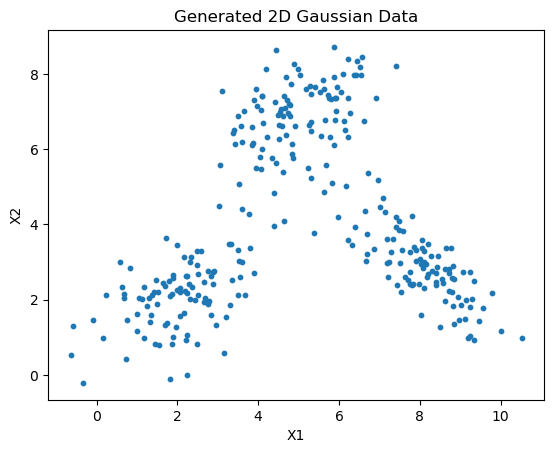

In [61]:
# Plot the generated data points
plt.scatter(data[:, 0], data[:, 1], s=10)
plt.title("Generated 2D Gaussian Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [62]:
kmeans = KMeansTorch(n_clusters=3, max_iters=1000, lr=0.01)
kmeans.fit(X)

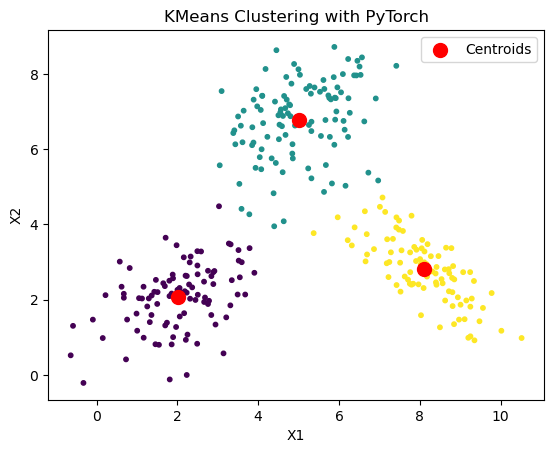

In [63]:
# Plot the clustered data points
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_.cpu(), s=10, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0].detach().cpu().numpy(), 
            kmeans.centroids[:, 1].detach().cpu().numpy(), 
            s=100, c='red', label='Centroids')
plt.title("KMeans Clustering with PyTorch")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


## PCA

In [64]:
# Generate synthetic data
np.random.seed(42)
data = np.random.randn(100, 5)
X = torch.tensor(data, dtype=torch.float32)

# Initialize the principal component vector (random)
w = torch.randn(X.size(1), requires_grad=True)

# Learning rate and iterations
lr = 0.01
iterations = 1000

# Gradient descent to find the principal component
for i in range(iterations):
    # Project the data onto the principal component vector
    projected = X @ w

    # Compute the loss (negative variance)
    loss = -torch.var(projected)

    # Backward pass and optimization
    loss.backward()

    with torch.no_grad():
        w += lr * w.grad
        w.grad.zero_()
    
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

# Normalize the principal component vector
principal_component = w / torch.norm(w)
print("Principal Component:", principal_component.detach().numpy())


Iteration 0, Loss: -2.730544090270996
Iteration 100, Loss: -0.10551180690526962
Iteration 200, Loss: -0.005215113516896963
Iteration 300, Loss: -0.00030530968797393143
Iteration 400, Loss: -1.9523718947311863e-05
Iteration 500, Loss: -1.298993424825312e-06
Iteration 600, Loss: -8.789064764869181e-08
Iteration 700, Loss: -5.988500806353159e-09
Iteration 800, Loss: -4.092266525645982e-10
Iteration 900, Loss: -2.7999031912417927e-11
Principal Component: [-0.800648   -0.4372556   0.30298597 -0.21899669 -0.16736259]


## Linear regression

In [65]:
import torch

# Generate synthetic data
np.random.seed(42)
X_np = np.random.rand(100, 1)
y_np = 3 * X_np.squeeze() + 2 + 0.1 * np.random.randn(100)

X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32).view(-1, 1)

# Initialize weights and bias
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Learning rate and iterations
lr = 0.1
iterations = 1000

# Gradient descent for linear regression
for i in range(iterations):
    # Compute predictions
    y_pred = X @ w + b

    # Compute the loss (mean squared error)
    loss = F.mse_loss(y_pred, y)

    # Backward pass and optimization
    loss.backward()

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        w.grad.zero_()
        b.grad.zero_()
    
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

print("Learned weights:", w.item())
print("Learned bias:", b.item())


Iteration 0, Loss: 8.708795547485352
Iteration 100, Loss: 0.7752379775047302
Iteration 200, Loss: 0.7727672457695007
Iteration 300, Loss: 0.7726246118545532
Iteration 400, Loss: 0.7726162672042847
Iteration 500, Loss: 0.7726158499717712
Iteration 600, Loss: 0.7726157903671265
Iteration 700, Loss: 0.7726157903671265
Iteration 800, Loss: 0.7726158499717712
Iteration 900, Loss: 0.7726158499717712
Learned weights: 3.198687863914529e-06
Learned bias: 3.4104321002960205


/tmp/ipykernel_76830/1637778878.py:25: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(y_pred, y)


##